## Business Problem

#### 1. **High Cancellation Rates**: Both City Hotel and Resort Hotel are experiencing high cancellation rates.

#### 2. **Impact on Revenue**: Cancellations are leading to decreased revenue and inefficient room utilization.
  
#### 3. **Primary Goal**: Reducing cancellation rates is a priority for both hotels to improve revenue generation and operational efficiency.
  
#### 4. **Purpose of Analysis**: The report focuses on analyzing hotel booking cancellations and identifying factors affecting business performance and annual revenue.

#### 5. **Business Recommendations**: The goal is to provide actionable insights and recommendations to address the high cancellation rates and improve hotel performance.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Python\Data\Hotal\hotel_bookings.csv') #Importing dataset
df.head() #Showing top 5 values

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [3]:
df.shape #showing shape of the data, there are 119390 rows and 32 columns

(119390, 32)

In [4]:
df.columns #Showing columns naa=me

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
df.info() #showing informatin about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.dtypes.value_counts() #counting data types

int64      16
object     12
float64     4
Name: count, dtype: int64

In [7]:
#"reservation_status_date" data type should be datetime but is object
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='mixed') #converting object to datetime
df['Month_Name'] = df['reservation_status_date'].dt.month_name() #Extracting month from date

In [8]:
df.dtypes #Showing data types

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [9]:
df.isnull().sum() #Showing null values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
df.drop(['company','agent'], inplace=True ,axis=1) #Dropping columns agent and company
df.dropna(inplace=True) #Dropping null values

In [11]:
df.isnull().sum() #Showing null values

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [12]:
df.describe() #Showing descriptive statistic overview

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-31 20:49:36.695991552
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-03 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-05 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-16 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-12-09 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [13]:
# Creating "total_stay" column
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Month_Name,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07,January,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07,January,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07,February,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07,February,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07,March,2


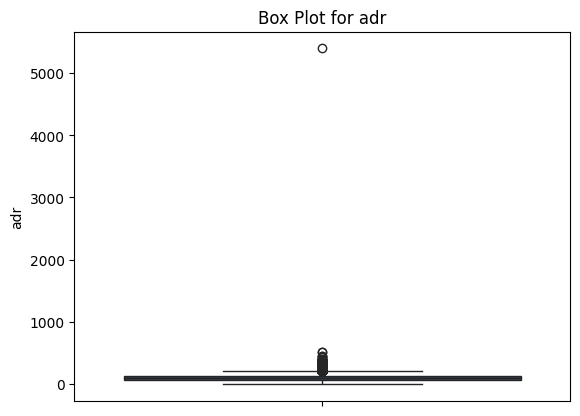

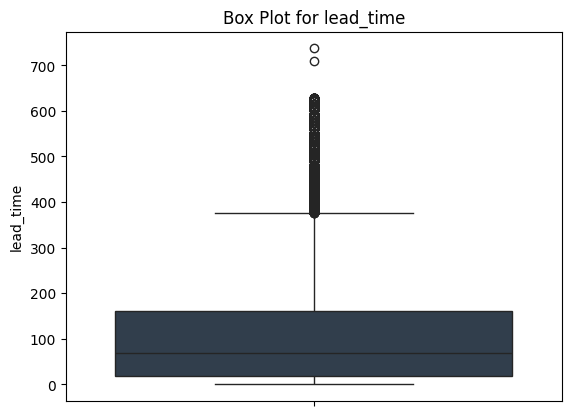

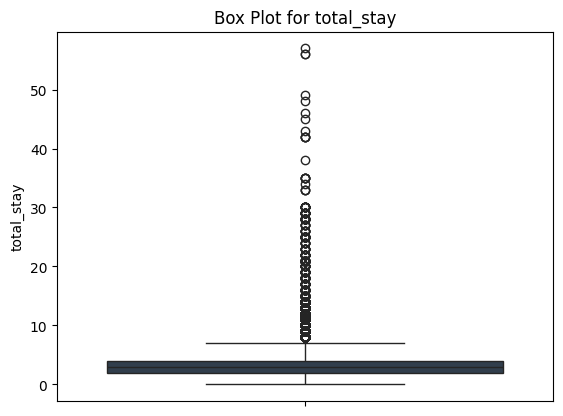

In [14]:
#Checking outlier
for i in ['adr', 'lead_time','total_stay']:
    plt.title(f'Box Plot for {i}')
    sns.boxplot(df[i],
                color='#2c3e50'
)
    plt.show()

In [15]:
#Removing outliers by Interquartile Range method
for i in ['adr', 'lead_time','total_stay']: #For loop Function
    q3 = np.percentile(df[i],75) #percentile of 75
    q1 = np.percentile(df[i],25) #percentile of 25
    IQR = q3-q1 #calculating interquartile range
    upper_bound = q3 + 1.5*IQR #calculating upper bound 
    lower_bound = q1 - 1.5*IQR #calculating lower bound
    df = df[(df[i]<=upper_bound) & (df[i]>=lower_bound)]

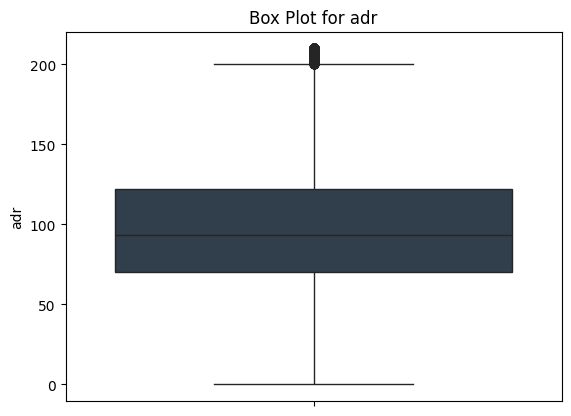

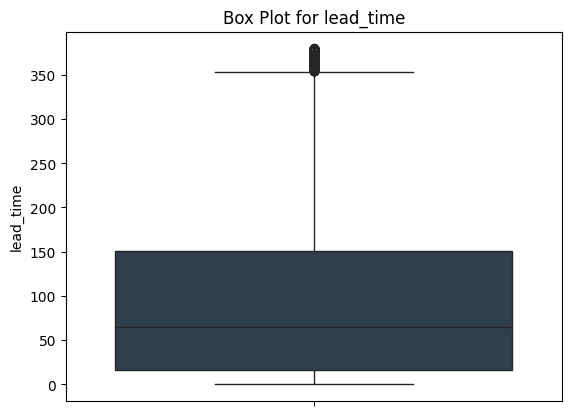

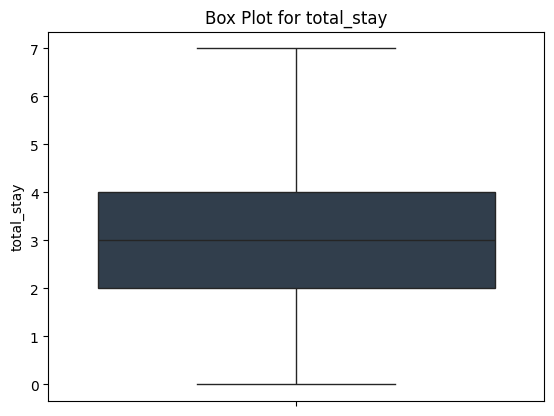

In [16]:
#Plotting boxplot to checking whether oulier removed or not
for i in ['adr', 'lead_time','total_stay']: #For Loop funxtion
    plt.title(f'Box Plot for {i}') #Title of the boxplot
    sns.boxplot(df[i], 
                color='#2c3e50'
) #Visualizing boxplot
    plt.show()

In [17]:
df.describe() #Showing descriptive statistic overview

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,total_stay
count,107299.000000,107299.000000,107299.000000,107299.000000,107299.000000,107299.000000,107299.000000,107299.000000,107299.000000,107299.000000,107299.000000,107299.000000,107299.000000,107299.000000,107299.000000,107299.000000,107299.000000,107299.000000,107299,107299.000000
mean,0.363899,94.800511,2016.139218,26.912851,15.811899,0.823046,2.238287,1.844453,0.083123,0.007502,0.034241,0.093943,0.142508,0.210645,2.163086,97.575533,0.060513,0.564656,2016-07-26 21:38:28.886382592,3.061333
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014-10-17 00:00:00,0.000000
25%,0.000000,16.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-01 00:00:00,2.000000
50%,0.000000,65.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,93.600000,0.000000,0.000000,2016-07-31 00:00:00,3.000000
75%,1.000000,151.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,122.000000,0.000000,1.000000,2017-02-04 00:00:00,4.000000
max,1.000000,380.000000,2017.000000,53.000000,31.000000,2.000000,5.000000,55.000000,3.000000,10.000000,1.000000,26.000000,72.000000,18.000000,259.000000,210.000000,8.000000,5.000000,2017-12-08 00:00:00,7.000000
std,0.481122,93.312764,0.708196,13.835787,8.763750,0.834488,1.359887,0.589111,0.349222,0.095421,0.181848,0.888398,1.545847,0.622173,14.726564,40.442453,0.241620,0.786438,NaN,1.723743


In [18]:
df.describe(include='object') #Showing object data's info

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,Month_Name
count,107299,107299,107299,107299,107299,107299,107299,107299,107299,107299,107299,107299
unique,2,12,5,175,7,5,10,12,3,4,3,12
top,City Hotel,May,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,January
freq,74379,10828,83788,43908,51388,88016,79773,68454,94311,80353,68253,9941


In [19]:
#Fuction for check unique values columns wise
for i in df.describe(include='object').columns: #For loop Fucntion
    print(i) #Column names
    print(df[i].unique()) #Unique values
    print('--------------------------------------')

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'ARG' 'POL' 'DEU' 'BEL'
 'CHE' 'CN' 'GRC' 'NLD' 'RUS' 'SWE' 'AUS' 'EST' 'CZE' 'BRA' 'ITA' 'FIN'
 'DNK' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'CHN' 'MEX' 'MAR' 'SMR' 'LVA' 'PRI'
 'SRB' 'IND' 'CHL' 'AUT' 'LTU' 'OMN' 'TUR' 'ZAF' 'AGO' 'ISR' 'CYM' 'ZMB'
 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV' 'HKG' 'IRN'
 'AND' 'GIB' 'URY' 'BLR' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT' 'NGA' 'MDV'
 'VEN' 'FJI' 'SVK' 'LBN' 'PHL' 'SYC' 'BHR' 'NZL' 'KAZ' 'THA' 'DOM' 'MYS'
 'UKR' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR'
 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU' 'VNM' 'AZE' 'PLW' 'QAT' 'EGY' 'MLT'
 'MWI' 'ECU'

In [20]:
df['is_canceled'] = df['is_canceled'].replace([0,1],['No','Yes']) #Replacing values 0 - No and 1 - Yes

# Exploratory Data Analysis

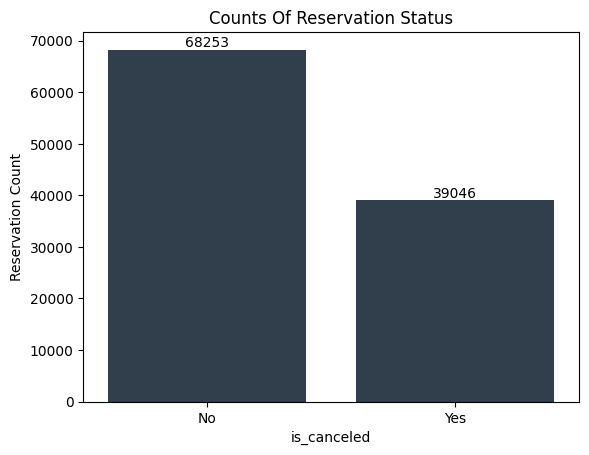

In [21]:
#Visualize count plot for reservation rate
plt.title('Counts Of Reservation Status') #Title of the graph
ax = sns.countplot(data = df, 
                   x = 'is_canceled', 
                   color='#2c3e50'
)
ax.bar_label(ax.containers[0])
plt.ylabel('Reservation Count') #Change Y labels
plt.show()

##### -Non-canceled Reservations (No): There are 68,253 reservations that were not canceled.
##### -Canceled Reservations (Yes): There are 39,046 reservations that were canceled.

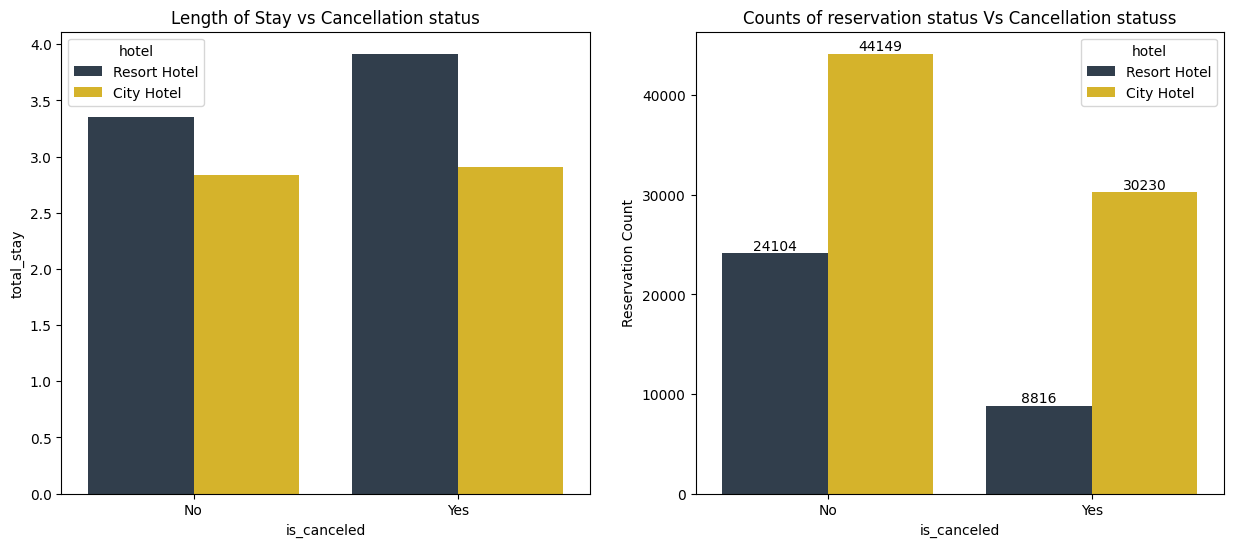

In [22]:
# Visualize length of stay vs cancellation 
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Length of Stay vs Cancellation status')
sns.barplot(data=df, 
            x='is_canceled', 
            y='total_stay', 
            hue = 'hotel' , 
            ci = None, 
            palette=['#2c3e50', '#f1c40f']
)



# Visualize Count of reservation status vs cancellation 
plt.subplot(1,2,2)
plt.title('Counts of reservation status Vs Cancellation statuss') #Title of the graph
ax = sns.countplot(data = df, 
                   x='is_canceled', 
                   hue= 'hotel', 
                   palette=['#2c3e50', '#f1c40f']
)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.ylabel('Reservation Count') #Changes Y labels
plt.show()


##### -For Resort Hotel the average length of stay is higher for non-canceled reservations compared to canceled ones.
##### -For City Hotel the average length of stay is slightly higher for non-canceled reservations, but the difference is less pronounced compared to the Resort Hotel.

##### -For Resort Hotel the number of non-canceled reservations is significantly higher than canceled ones.
##### -For City Hotel the number of non-canceled reservations is also higher than canceled ones, but the difference is less pronounced compared to the Resort Hotel.

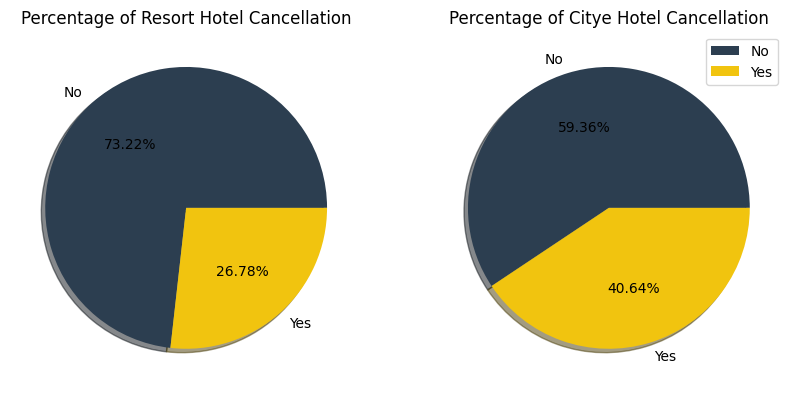

In [23]:
#Visualize percenge cancellation of city hotels and resort hotels
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.title('Percentage of Resort Hotel Cancellation')
plt.pie(df[df['hotel']=='Resort Hotel']['is_canceled'].value_counts().values, 
        labels=df[df['hotel']=='Resort Hotel']['is_canceled'].value_counts().index, 
        shadow=True, autopct='%.2f%%',
       colors = ['#2c3e50', '#f1c40f']
)
plt.legend

plt.subplot(1,2,2)
plt.title('Percentage of Citye Hotel Cancellation')
plt.pie(df[df['hotel']=='City Hotel']['is_canceled'].value_counts().values,
        labels=df[df['hotel']=='City Hotel']['is_canceled'].value_counts().index, 
        shadow=True, autopct='%.2f%%',
       colors=['#2c3e50', '#f1c40f']
)
plt.legend()
plt.show()

In [24]:
resortHotel_price = df[df['hotel']=='City Hotel'].groupby('reservation_status_date')[['adr']].agg('mean')
#grouping date and calculating adr mean value for each date
cityHotel_price = df[df['hotel']=='Resort Hotel'].groupby('reservation_status_date')[['adr']].agg('mean')
#grouping date and calculating adr mean value for each date

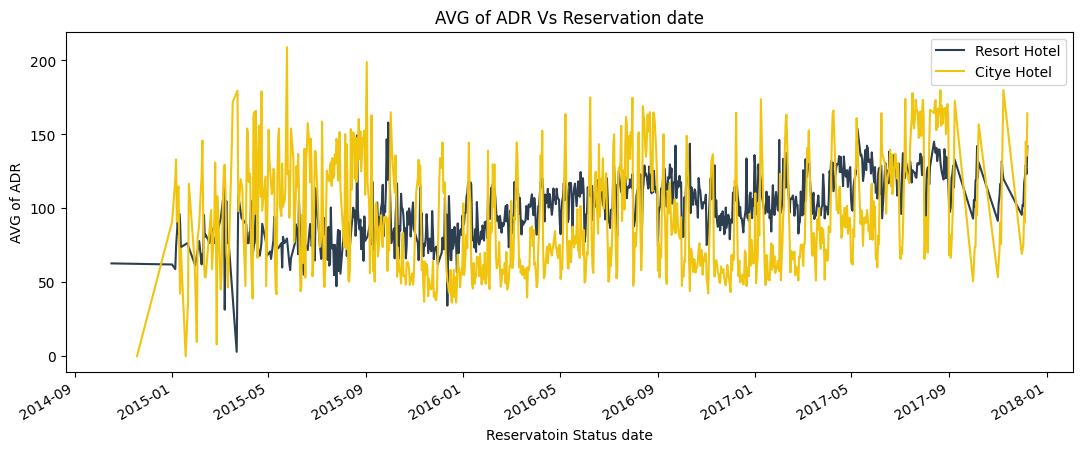

In [25]:
#Visualize Mean of ADR Vs Reservation date
plt.figure(figsize=(13,5))
plt.title('AVG of ADR Vs Reservation date') #Title of the graph
resortHotel_price['adr'].plot(label = 'Resort Hotel', 
                              color = '#2c3e50' 
) #creates line graph
cityHotel_price['adr'].plot(label = 'Citye Hotel', 
                            color = '#f1c40f'
) #creates line graph
plt.ylabel('AVG of ADR') #Changes Y labels
plt.xlabel('Reservatoin Status date') #Changes X labels
plt.legend()
plt.show()

#### -City Hotels (orange line) show significantly more price volatility compared to Resort Hotels (blue line)
#### -City Hotels generally command higher peak prices than Resort Hotels
#### -Resort Hotels demonstrate more consistent pricing strategy

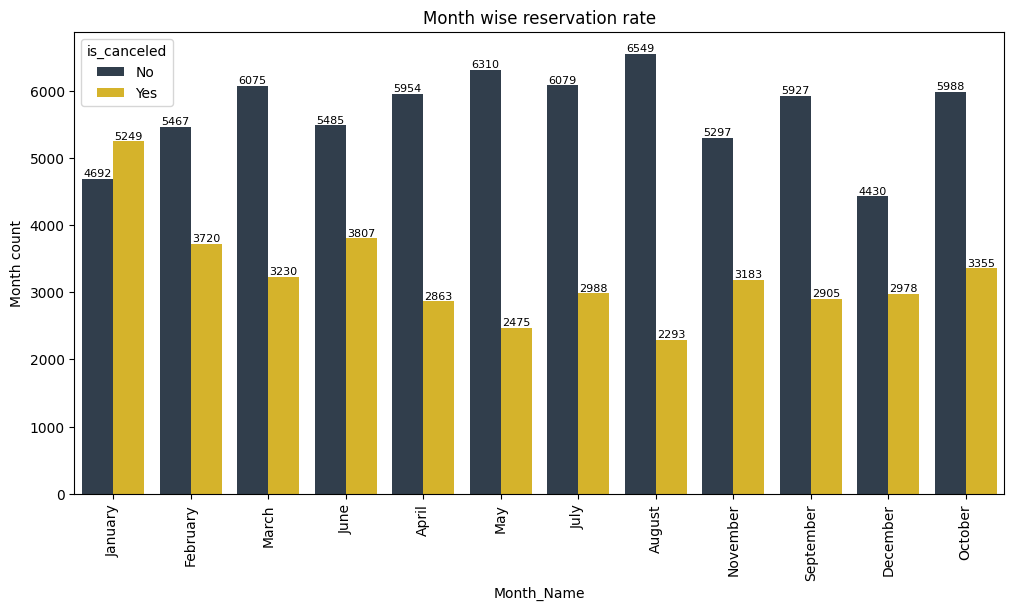

In [26]:
#Visualize barplot to check mounth wise reservation status
plt.figure(figsize=(12,6))
plt.title('Month wise reservation rate') #Title of the graph
ax = sns.countplot(data = df, x = 'Month_Name', hue = 'is_canceled', palette=['#2c3e50', '#f1c40f'])
ax.bar_label(ax.containers[0], fontsize=8)
ax.bar_label(ax.containers[1], fontsize=8)
plt.xticks(rotation = 90)
plt.ylabel('Month count') #Changes y labels
plt.show()

#### -August is the month where reservation and cancellation

<Axes: xlabel='Month_Name'>

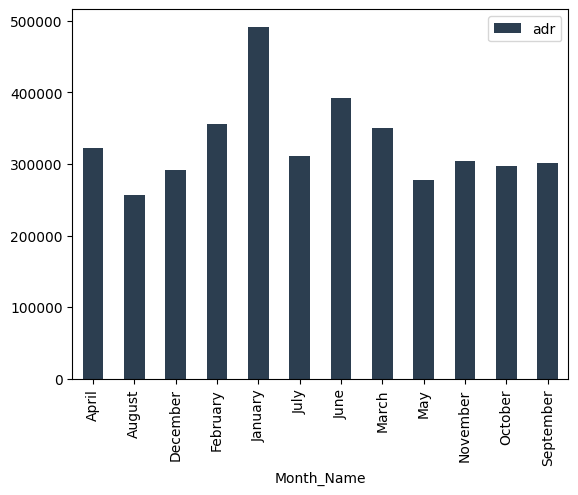

In [27]:
# Visualize sum of Adr Vs Month where the reservation is cancelled, 
cancel_adr = df[df['is_canceled']=='Yes'].groupby('Month_Name')[['adr']].sum()
cancel_adr.plot(kind = 'bar', 
                color = '#2c3e50')

#### -January is the month where the ADR value is the higher which is the main cause of hotel cancellation

In [28]:
df.sample() #Showing one random row

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Month_Name,total_stay
80744,City Hotel,Yes,25,2015,November,48,28,1,1,2,...,No Deposit,0,Transient,95.0,0,1,Canceled,2015-11-23,November,2


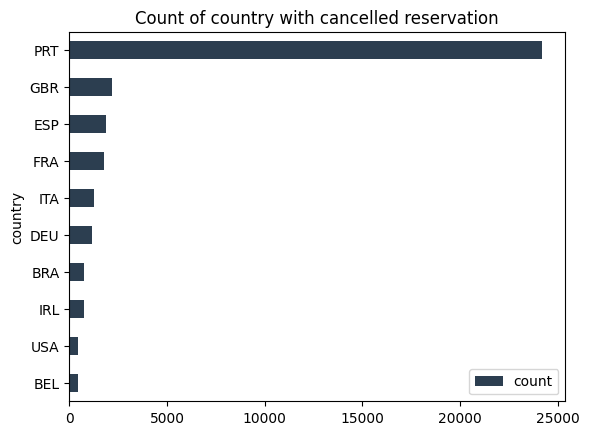

In [29]:
#Visualize Country wise cancelled reservation  
countryWiseCancellation = df[df['is_canceled']=='Yes'] #Selecing data set where cancellation is yes
countryWiseCancellation['country'].value_counts().head(10).sort_values().plot(kind = 'barh',
                                                                              color = '#2c3e50') 
#Plotting top 10 country reservation cancelled
plt.title('Count of country with cancelled reservation') #Gives title of the graph
plt.legend(['count'])
plt.show()

#### -Country wise portugal is the country where reservation cancellation is highest

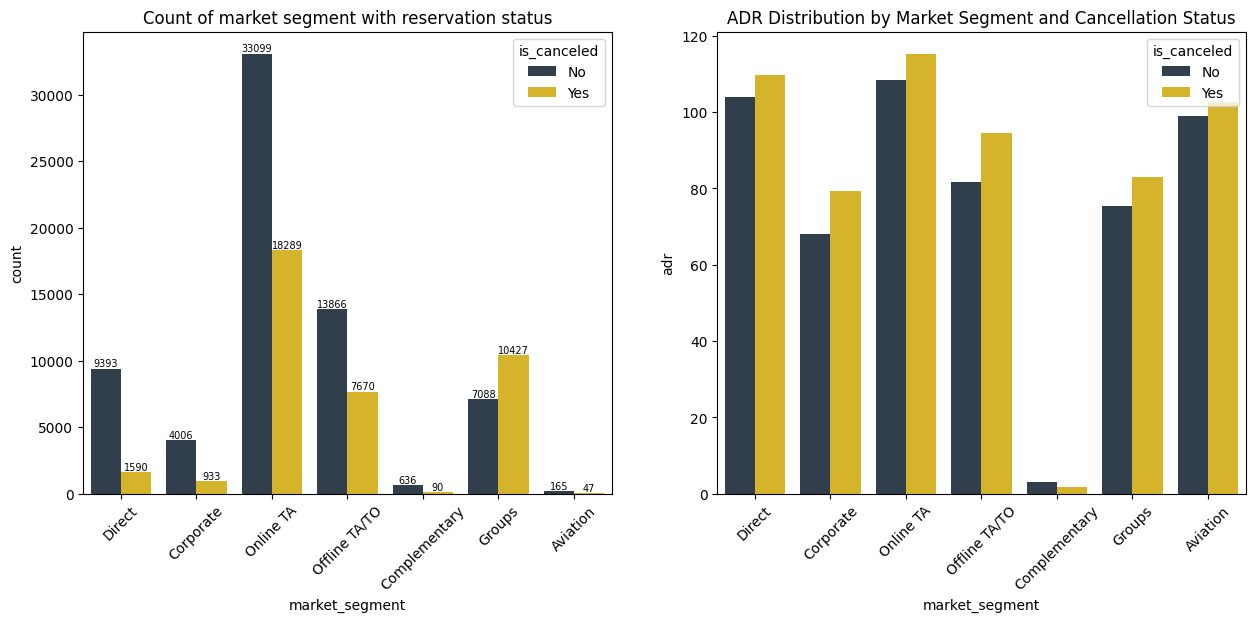

In [30]:
plt.figure(figsize=(15,6))
#Visualize count of market segment with reservation rate
plt.subplot(1,2,1)
plt.title('Count of market segment with reservation status') #Shows title of the graph
ax = sns.countplot(data = df, 
                   x ='market_segment', 
                   hue = 'is_canceled', 
                   palette=['#2c3e50', '#f1c40f']
)
ax.bar_label(ax.containers[0],fontsize=7)
ax.bar_label(ax.containers[1],fontsize=7)
plt.xticks(rotation = 45)


#Visualize ADR by market segment 
plt.subplot(1,2,2)
sns.barplot(data=df, 
            x='market_segment', 
            y='adr', hue='is_canceled', 
            ci = None, palette=['#2c3e50', '#f1c40f']
)
plt.title('ADR Distribution by Market Segment and Cancellation Status') #Shows title of the graph
plt.xticks(rotation=45)
plt.show()

##### -Online TA (Online Travel Agents) has the highest number of reservations overall, with a high proportion of both canceled and non-canceled bookings (33,099 non-canceled and 18,289 canceled).
##### -Online TA segments has highest ADRs, with canceled bookings showing slightly higher ADRs than non-canceled ones.
##### -Direct and Aviation  segment have similar ADRs, and canceled bookings tend to have a higher ADR.

In [31]:
market_segment_canc_yes = df[df['is_canceled'] == 'Yes'].groupby('reservation_status_date')[['adr']].agg('mean')
#grouping reservation date  where reservation cancelled and calculating mean of ADR for date
market_segment_canc_no = df[df['is_canceled'] == 'No'].groupby('reservation_status_date')[['adr']].agg('mean')
#grouping reservation date  where reservation not cancelled and calculating mean of ADR for date

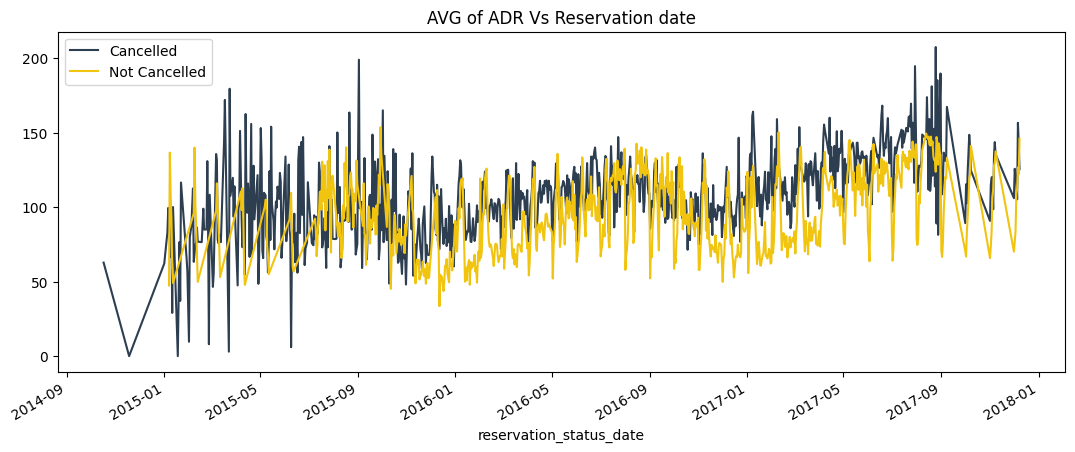

In [32]:
#Visualize AVG of ADR Vs Reservation date
plt.figure(figsize=(13,5))
plt.title('AVG of ADR Vs Reservation date')
market_segment_canc_yes['adr'].plot(label = 'Cancelled', color = '#2c3e50')
market_segment_canc_no['adr'].plot(label = 'Not Cancelled', color = '#f1c40f')
plt.legend()
plt.show()

#### from 2015/9 can be observed that as the mean of ADR is higher the cancellation rate is also higher and vice versa

In [33]:
mark = df[(df['reservation_status_date']>'2015-09') & (df['reservation_status_date']<'2018')]

In [34]:
market_segment_canc_yes1 = mark[mark['is_canceled'] == 'Yes'].groupby('reservation_status_date')[['adr']].agg('mean')
#grouping reservation date  where reservation cancelled and calculating mean of ADR for date
market_segment_canc_no1 = mark[mark['is_canceled'] == 'No'].groupby('reservation_status_date')[['adr']].agg('mean')
#grouping reservation date  where reservation not cancelled and calculating mean of ADR for date

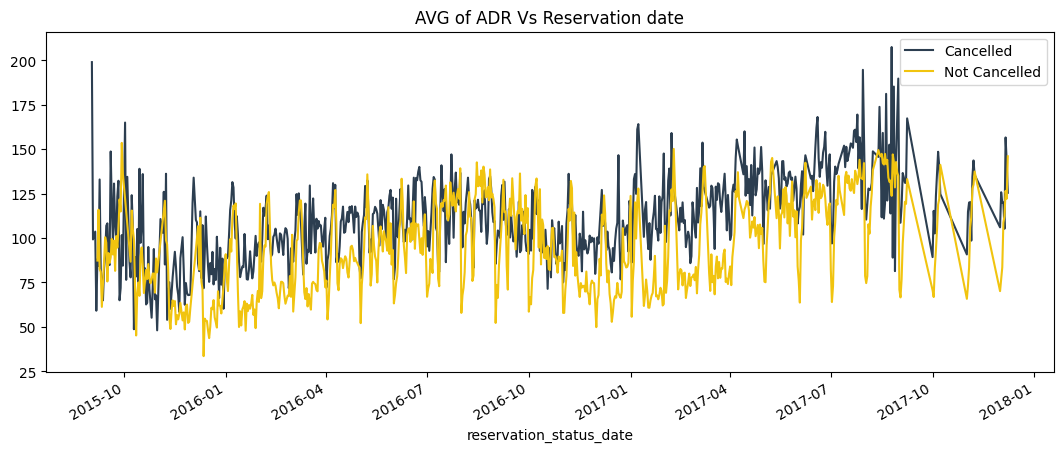

In [35]:
#Avg ADR Vs reservation date with reservation status
plt.figure(figsize=(13,5))
plt.title('AVG of ADR Vs Reservation date')
market_segment_canc_yes1['adr'].plot(label = 'Cancelled', 
                                     color = '#2c3e50'
)


market_segment_canc_no1['adr'].plot(label = 'Not Cancelled',
                                    color = '#f1c40f'
)
plt.legend()
plt.show()

##### -Both cancelled and non-cancelled bookings show significant price volatility over time
##### -The ADR generally ranges between $50-$150, with some peaks reaching around $200
##### -Cancelled bookings (blue line) often show higher ADR values than non-cancelled bookings (orange line)
##### -There are noticeable seasonal patterns, with higher rates appearing in peak travel periods

In [36]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Month_Name,total_stay
0,Resort Hotel,No,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07,January,0
2,Resort Hotel,No,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07,February,1
3,Resort Hotel,No,13,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07,February,1
4,Resort Hotel,No,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07,March,2
5,Resort Hotel,No,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07,March,2


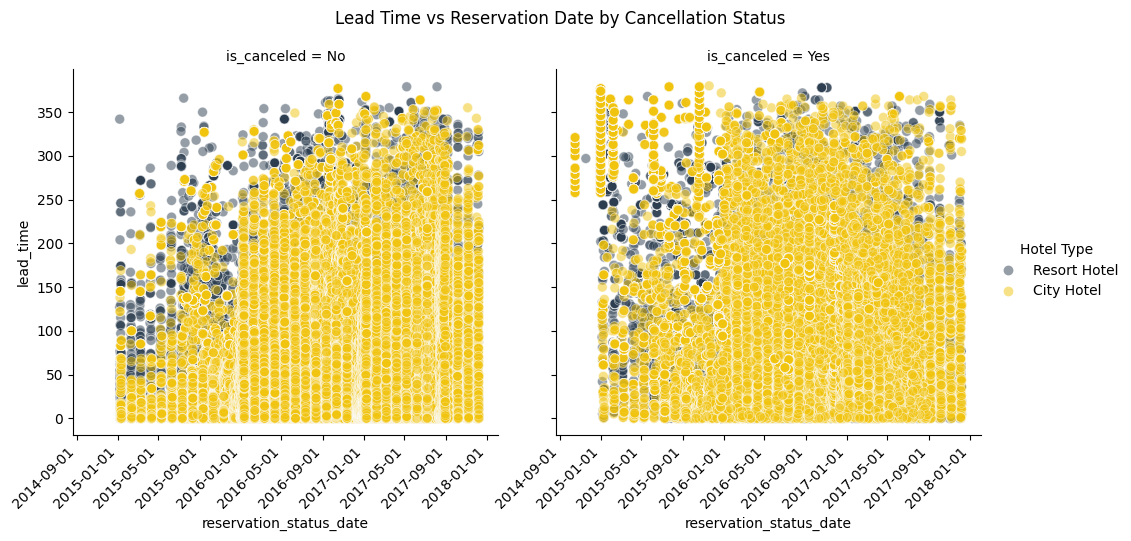

In [37]:
# Create the relplot with custom palette and other styling parameters
g = sns.relplot(data=df, 
                x='reservation_status_date', 
                y='lead_time', 
                col='is_canceled', 
                hue='hotel', 
                kind='scatter',
                palette=['#2c3e50', '#f1c40f'],  # Set distinct colors for better visibility
                alpha=0.5,  # Add transparency to see overlapping points
                s=50)      # Adjust point size

# Rotate x-axis labels for all subplots
g.set_xticklabels(rotation=45, ha='right')

# Adjust the layout
g.fig.subplots_adjust(bottom=0.2)

# Optional: Customize the plot further
g.fig.suptitle('Lead Time vs Reservation Date by Cancellation Status', y=1.05)
g._legend.set_title('Hotel Type')

plt.show()

##### -The right panel (is_canceled = Yes) shows more bookings overall, suggesting a high cancellation rate
##### -City Hotels (orange) have significantly more cancellations than Resort Hotels (blue)
##### -Most bookings are made between 0-200 days in advance
##### -There's a noticeable increase in longer lead times (200+ days) from 2016 onwards

In [38]:
cityHotelleadtime = df[df['hotel']=='City Hotel']
resortHotelleadtime = df[df['hotel']=='Resort Hotel']

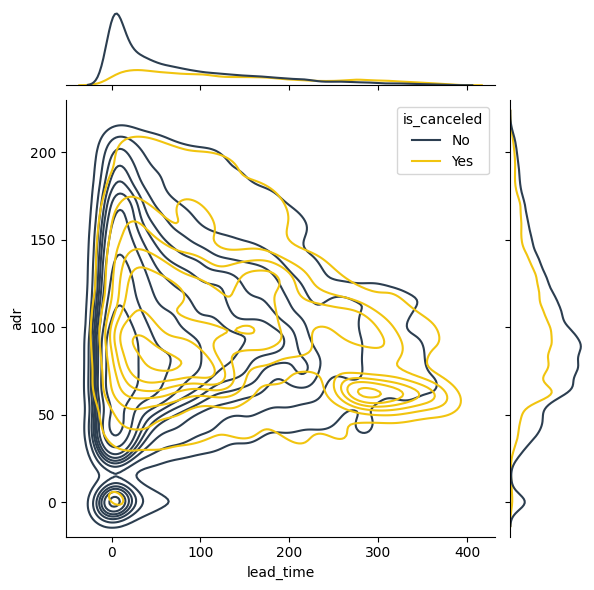

In [39]:

sns.jointplot(
    data=df,
    x='lead_time',
    y='adr',
    hue='is_canceled',
    kind='kde' , 
    palette=['#2c3e50', '#f1c40f'] 
)
plt.show()

##### -Most bookings are made with shorter lead times (0-100 days)
##### -Non-cancelled bookings (blue) show a higher peak at very short lead timesx`x`
##### -Cancelled bookings (orange) have a flatter distribution

##### -ADR mostly ranges from about 50 to 200.
##### -There's a peak in the middle range 